In [1]:
# import the important libraries
import pandas as pd     # for dataframe
import numpy as np      # for arraies
import matplotlib.pyplot as plt  # for visualization 
%matplotlib inline
import seaborn as sns           # for visualization 

In [2]:
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco['TotalCharges'] = telco['TotalCharges'].replace(" ",np.nan)

In [4]:
telco.dropna(axis=0,inplace=True)

<a id='visualization'></a>
# Visualization

In [5]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco.shape

(7032, 21)

## Univariate Exploration

In [7]:
df=telco.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
num_col = telco[['tenure','MonthlyCharges','TotalCharges']]

**profiling our clients**

In [ ]:
def pie(x):
    sorted_counts = df[x].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
            counterclock = False,autopct='%.1f%%',shadow=True);
    plt.axis('square')
    plt.show()

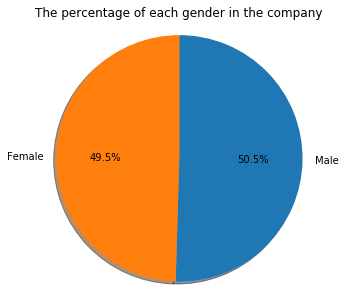

In [ ]:
plt.figure(figsize=(5,5))
plt.title('The percentage of each gender in the company')
pie('gender')
plt.show()

**The company has an approximately equal number of genders**

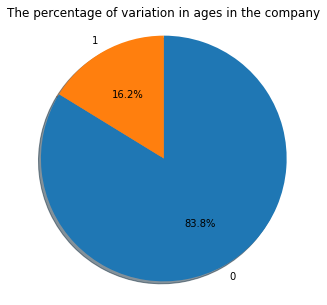

In [ ]:
plt.figure(figsize=(5,5))
plt.title('The percentage of variation in ages in the company')
pie('SeniorCitizen')
plt.show()

**16.2% of the company's clients are elderly and the rest are young**

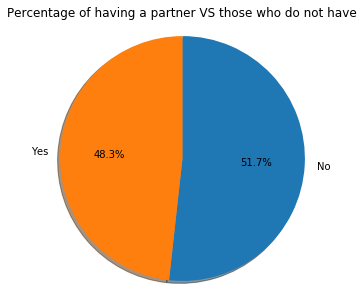

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Percentage of having a partner VS those who do not have')
pie('Partner')
plt.show()

**51% of clients don't have a partner**

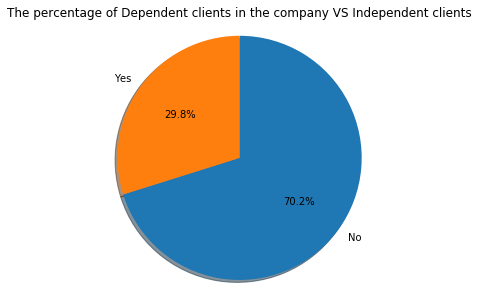

In [ ]:
plt.figure(figsize=(5,5))
plt.title('The percentage of Dependent clients in the company VS Independent clients')
pie('Dependents')
plt.show()

**we can see 70.2% of clints are Independent**

In [ ]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.5
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


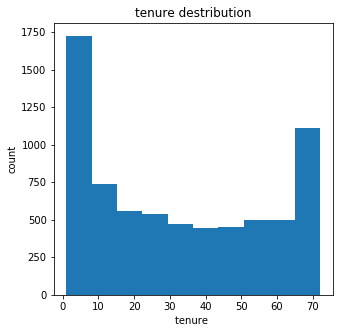

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(num_col.tenure)
plt.title('tenure destribution')
plt.xlabel('tenure ')
plt.ylabel('count')
plt.show()

**we can't gain many information from this values so I will try to count the logarithm to it and make a distribution again**

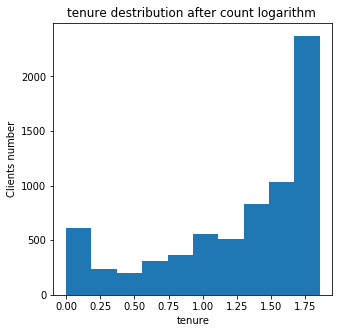

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(np.log10(num_col.tenure)) # here i count the logarithm 10 for the tenure feature
plt.title('tenure destribution after count logarithm ')
plt.xlabel('tenure')
plt.ylabel('Clients number')
plt.show()

**We can see now that the longer the tenure, the greater the number of clients**

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist(num_col.TotalCharges)
plt.ylim(0,3000)
plt.title('TotalCharges destribution')
plt.xlabel('TotalCharges')
plt.ylabel('Clients number')

plt.subplot(1,2,2)
plt.hist(num_col.MonthlyCharges)
plt.ylim(0,3000)
plt.title('MonthlyCharges destribution')
plt.xlabel('MonthlyCharges')
plt.show()

**For Total Charges, the largest number of customers pays a value between 0 and 2000, after which the number of clients decreases dramatically**

**For monthly Charges, there is a variation in the number of customers, but it increases between 20 and 25**

In [ ]:
plt.figure(figsize=(12,6))


for i in range(len(list(num_col.columns))):
    plt.subplot(1,3,i+1)
    sns.boxplot(num_col.iloc[:,i])

**there are no outliers**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **For the tenure feature the distribution was not good to observe something so I calculate the logarithm to see the distribution accurately**



## Bivariate Exploration

In [ ]:
service = telco.iloc[:,6:-4]

In [ ]:
service.head()

In [ ]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Churn,data=telco)
    plt.ylim(0,5000)
    plt.title('num of clints who used {} left vs stay'.format(feature))
plt.show()

### The previous graph shows the relationship of leaving the company with services, and knowing the number of those who left the company and who remained in relation to using the services

In [ ]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.SeniorCitizen,data=telco)
    plt.ylim(0,6000)
    plt.title('senior citizen VS youth in using {}'.format(feature))
plt.show()

### The previous plot aims to find out the number of elderly people who use different services and the number of young people who use the same services as well

In [ ]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Dependents,data=telco)
    plt.ylim(0,5000)
    plt.title('Dependents VS Independent in using {}'.format(feature))
plt.show()

### The previous plot aims to find out the number of dependent people who use different services and the number of independent people who use the same services as well

In [ ]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = telco.Partner,data=telco)
    plt.ylim(0,5000)
    plt.title('clints who have partner VS not in using {}'.format(feature))
plt.show()

### The previous plot aims to find out the number of clients who has partner use different services and the number of clients who don't have partner use the same services as well

In [ ]:
sns.pairplot(num_col)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **there are a big positive correlation between tenure,Monthly and Total charges**


## Multivariate Exploration

In [ ]:
sns.heatmap(num_col.corr(),annot=True,linewidths=2)
plt.title('correlation between the numerical variables in the dataset')
plt.show()

**now we can see how much each feature correlated with the others**

<a id='conclusions'></a>
## Conclusions
there are senior citizens join the company and after few days they didn't find good servers suitable to them so they decided to leave, on the other hand, 33% of single clients also left the company after the found a lot of services more sutabile to clients with partners.
a lot of clients using Fiber Optic and a lot of them left the company I think the quality is not good enough 

## in the end there are some problems the company faces

- 41.7% of senior citizens left the company.
- 33% of customers who don't have a partner left the company.
- 31% of independent customers left the company
- 15.4% of dependent customers  left the company
- 8.7% of customers left the company after the first month
- 19.3% of customers left the company after first 5 months

- A large number of customers using Fiber Optic have left the company
- Clients who do not use online security, many of them leave the company
- Many clients who do not use technical support have left the company
- Customers who pay month to month are the most who leave the company

In [ ]:
!jupyter nbconvert presentation.ipynb --to slides --post serve --template output_toggle

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')